In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Load dataset

In [2]:
'''
    Here we train a modernized version of the LeNet5 [1] on the MNIST dataset.
    This code was modified from github.com/fchollet/keras/examples visit that site for more examples.
    
    [1] LeCun, Y., Bottou, L., Bengio, Y., and Haffner, P. (1998d).
        Gradient-based learning applied to document recognition.
        Proceedings of the IEEE, 86(11), 2278–2324.
'''

batch_size = 128
nb_classes = 10  # 10 digits from 0 to 9

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


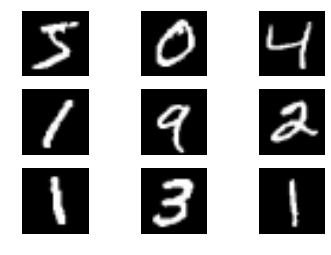

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

# Model definition

<img src="lenet5.png">

In [ ]:
""" ref: http://eblearn.sourceforge.net/beginner_tutorial2_train.html

The input images are 32×32 in size with 1 channel(i.e grayscale image, not color)
From figure 1, we can say that there are 6-layers in our convnet.
Layer C1 is a convolution layer with 6 feature maps and a 5×5 kernel for each feature map.
Layer S1 is a subsampling layer with 6 feature maps and a 2×2 kernel for each feature map.
Layer C3 is a convolution layer with 16 feature maps and a 6×6 kernel for each feature map.
Layer S4 is a subsampling layer with 16 feature maps and a 2×2 kernel for each feature map.
Layer C5 is a convolution layer with 120 feature maps and a 6×6 kernel for each feature map.
Layer C6 is a fully connected layer with 84 neurons
Layer OUTPUT returns the final label
"""

In [ ]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='full'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='full'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Train

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

nb_epoch = 2  # try increasing this number
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# Visualize sample results

In [ ]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i, 0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % res[i], fontsize=18)